## Feature Selection Techniques

- https://medium.com/analytics-vidhya/feature-selection-techniques-2614b3b7efcd

In [1]:
import os
import sys
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
import warnings; warnings.filterwarnings('ignore')
#plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
%matplotlib inline

### 세가지 방법
1. Filter Method
2. Wrapper Method
3. Embedded Method

### 1. Filter Method

#### Pearson Correlation

In [2]:
df = pd.read_csv("../data/mtcars/mtcars.csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df = df.drop('model', axis = 1)
df.dtypes

mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [4]:
corr = df.corr()
corr

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


<Axes: >

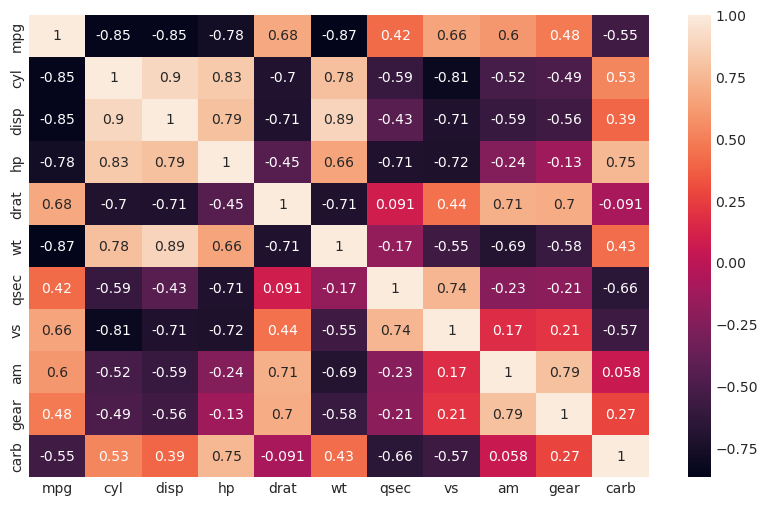

In [5]:
plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True)

In [6]:
threshold = 0.5
a = abs(corr['mpg'])
result = a[a>0.5]
result

mpg     1.000000
cyl     0.852162
disp    0.847551
hp      0.776168
drat    0.681172
wt      0.867659
vs      0.664039
am      0.599832
carb    0.550925
Name: mpg, dtype: float64

In [7]:
display(df[['cyl', 'disp']].corr())
display(df[['cyl', 'hp']].corr())
display(df[['cyl', 'drat']].corr())
display(df[['cyl', 'wt']].corr())
display(df[['cyl', 'vs']].corr())
display(df[['cyl', 'am']].corr())
display(df[['cyl', 'carb']].corr())

,cyl,disp
cyl,1.000000,0.902033
disp,0.902033,1.000000


,cyl,hp
cyl,1.000000,0.832447
hp,0.832447,1.000000


,cyl,drat
cyl,1.000000,-0.699938
drat,-0.699938,1.000000


,cyl,wt
cyl,1.000000,0.782496
wt,0.782496,1.000000


,cyl,vs
cyl,1.000000,-0.810812
vs,-0.810812,1.000000


,cyl,am
cyl,1.000000,-0.522607
am,-0.522607,1.000000


,cyl,carb
cyl,1.000000,0.526988
carb,0.526988,1.000000


In [8]:
df1 = df.drop(['cyl', 'disp', 'hp', 'drat', 'vs', 'am'], axis =1)
df1.head()

,mpg,wt,qsec,gear,carb
0,21.0,2.620,16.46,4,4
1,21.0,2.875,17.02,4,4
2,22.8,2.320,18.61,4,1
3,21.4,3.215,19.44,3,1
4,18.7,3.440,17.02,3,2


위의 코드에서 cyl과 disp 변수가 서로 높은 상관관계(0.902033)를 가지고 있음을 알 수 있습니다.   
따라서 타겟 변수인 mpg가 cyl과 상관관계가 높으므로  유지하고 다른 변수는 삭제하는 목표 변수와 비교한 다음, 
마지막 변수까지 동일한 프로세스를 따라 확인하면 wt, qsec, gear, carb의 네 가지 특징이 남습니다. 이것이 피어슨 상관관계에 의해 주어진 최종 특징입니다.

#### VIF

상관관계는 두 변수가 높은 상관관계를 가지며 주어진 데이터 세트 내에서 분산에 대한 유사한 정보를 포함하고 있는 상태를 말합니다.  
변수 간의 상관관계를 감지하려면 상관관계 행렬을 생성하고 절대값이 큰 변수를 찾으면 됩니다.

- VIF 요인을 계산합니다.
- 각 예측 변수에 대한 요인을 검사하여 VIF가 5~10 사이인 경우 다중 공선성이 존재할 가능성이 있으므로 변수를 삭제하는 것을 고려해야 합니다.

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop('mpg', axis = 1)
y  = df['mpg']

In [10]:

def cal_vif(X):
    thresh = 5
    output = X.copy()
    k = X.shape[1]
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    for i in range(1, k):
        print('Iteration no ', i)
        print(vif)
        a = np.argmax(vif)
        print('Max vif is for variable no: ', a)
        if(vif[a] <= thresh):
            break
        if(i==1):
            output = X.drop(X.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
            
    return (output)

In [11]:
selected_features = cal_vif(X)

Iteration no  1
[112.62982779028376, 98.93079080232329, 56.047780574327106, 132.21435319153656, 182.94804892931742, 317.5343763853064, 8.752581047798778, 7.412019552810422, 119.80487876498725, 32.213836113817116]
Max vif is for variable no:  5
Iteration no  2
[82.35453610136648, 80.90073004637435, 55.580065574175435, 98.9271196525115, 95.56121811810301, 6.8735504143211354, 7.234123824175732, 100.71027610040106, 21.84015584783301]
Max vif is for variable no:  7
Iteration no  3
[81.2702733119184, 80.21029286131379, 55.03101162645057, 59.87727217382084, 95.26465869214627, 6.491650449889378, 5.847619985268266, 20.47633202797162]
Max vif is for variable no:  4
Iteration no  4
[77.7369646371158, 37.78801631145948, 44.89371954354733, 54.87258386660498, 5.4288647677534625, 5.230633425049231, 13.768474487262548]
Max vif is for variable no:  0
Iteration no  5
[27.916047152584948, 41.78603746657891, 29.900961861836688, 4.933343395628271, 4.634701624890053, 13.763708254603651]
Max vif is for varia

In [12]:
selected_features.head()

,disp,vs,am
0,160.0,0,1
1,160.0,0,1
2,108.0,1,1
3,258.0,1,0
4,360.0,0,0


### 2. Wrapper Method

- 래퍼 메서드에는 하나의 머신 러닝 알고리즘이 필요하며 그 성능을 평가 기준으로 사용합니다.
- 선택한 머신 러닝 알고리즘에 피처를 입력하고 모델 성능에 따라 피처를 추가/제거합니다.
- 반복적이고 계산 비용이 많이 드는 프로세스이지만 필터 방식보다 정확도가 높습니다.

#### Step Forward Selection

In [13]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [14]:
X = df.drop('mpg', axis = 1)
y  = df['mpg']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
LR = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sfs1 = sfs(LR, k_features=5, forward=True, floating=False, scoring='r2', verbose=2, cv = 5)

sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-08-26 22:36:22] Features: 1/5 -- score: 0.585116651319956[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-08-26 22:36:22] Features: 2/5 -- score: 0.6603220657416464[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-08-26 22:36:22] Features: 3/5 -- score: 0.7358645181039354[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [18]:
sfs1.k_feature_idx_

(1, 3, 4, 8, 9)

In [19]:
X.columns

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

#### Backward Elimination

In [20]:
import statsmodels.tools.tools as sm
from statsmodels.regression.linear_model import OLS

In [21]:
X = df.drop('mpg', axis = 1)
y  = df['mpg']

In [22]:
cols = list(X.columns)
pmax = 1
while (len(cols) > 0):
    p = list()
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)
    pmax = max(p)
    features_with_p_max = p.idxmax()
    if(pmax > 0.05):
        cols.remove(features_with_p_max)
    else:
        break

In [23]:
selected_features = cols
print(selected_features)

['wt', 'qsec', 'am']


#### Recursive Feature elimination

In [24]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [25]:
X = df.drop('mpg', axis = 1)
y  = df['mpg']

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
X_rfe = rfe.fit_transform(X, y)

In [28]:
model.fit(X_rfe, y)

LinearRegression()

In [29]:
print(rfe.support_)

[False False False False  True  True False  True False False]


In [30]:
print(rfe.ranking_)

[6 8 7 2 1 1 5 1 4 3]


In [31]:
nof_list = np.arange(1, 10)
high_score = 0
nof =0
score_list = []

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe, y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)
    if (score > high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d"%nof)
print("Score with %d features: %f"%(nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.316400


In [32]:
cols = list(X.columns)
model = LinearRegression()

rfe = RFE(model, n_features_to_select=3)
X_rfe = rfe.fit_transform(X, y)

model.fit(X_rfe, y)

temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp == True].index
print(selected_features_rfe)

Index(['wt', 'qsec', 'am'], dtype='object')


### 3. Embedded Method

임베디드 메서드는 모델 훈련 프로세스의 각 반복을 처리하고 특정 반복에 대해 훈련에 가장 많이 기여하는 특징을 신중하게 추출한다는 의미에서 반복적인 방식입니다.  
정규화 방법은 계수 임계값이 주어진 특징에 불이익을 주는 가장 일반적으로 사용되는 임베디드 방법입니다.  
여기서는 릿지 정규화를 사용하여 특징 선택을 수행합니다.  
릿지 정규화는 피처가 관련성이 없는 경우 해당 계수에 페널티를 주어 0으로 만듭니다.  
따라서 계수가 0인 특징은 제거되고 나머지는 취합니다.

In [33]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [34]:
X = df.drop('mpg', axis = 1)
y  = df['mpg']

In [35]:
from sklearn.linear_model import LassoCV

reg = LassoCV()
reg.fit(X, y)

print("Best alpha using built-in lassoCV: %f" %reg.alpha_)
print("Best score using built-in lassoCV: %f" %reg.score(X, y))

Best alpha using built-in lassoCV: 28.467464
Best score using built-in lassoCV: 0.742417


In [36]:
coef = pd.Series(reg.coef_, index = X.columns)

In [37]:
coef

cyl    -0.000000
disp   -0.032546
hp     -0.015444
drat    0.000000
wt     -0.000000
qsec    0.000000
vs      0.000000
am      0.000000
gear    0.000000
carb   -0.000000
dtype: float64

In [38]:
print("Lasso picked " + str(sum(coef !=0)) + " variables and eliminated the other " + str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 8 variables


<Axes: >

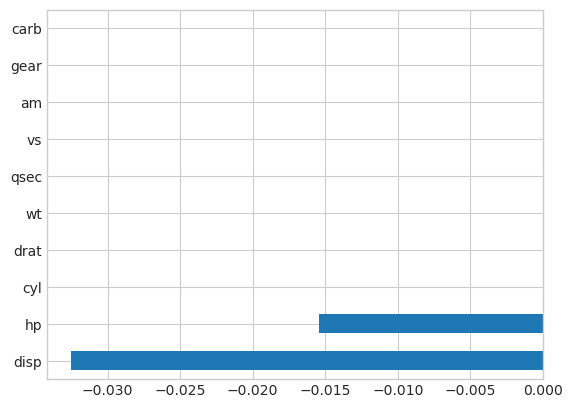

In [39]:
imp_coef = coef.sort_values()

imp_coef.plot(kind = 'barh')